# About

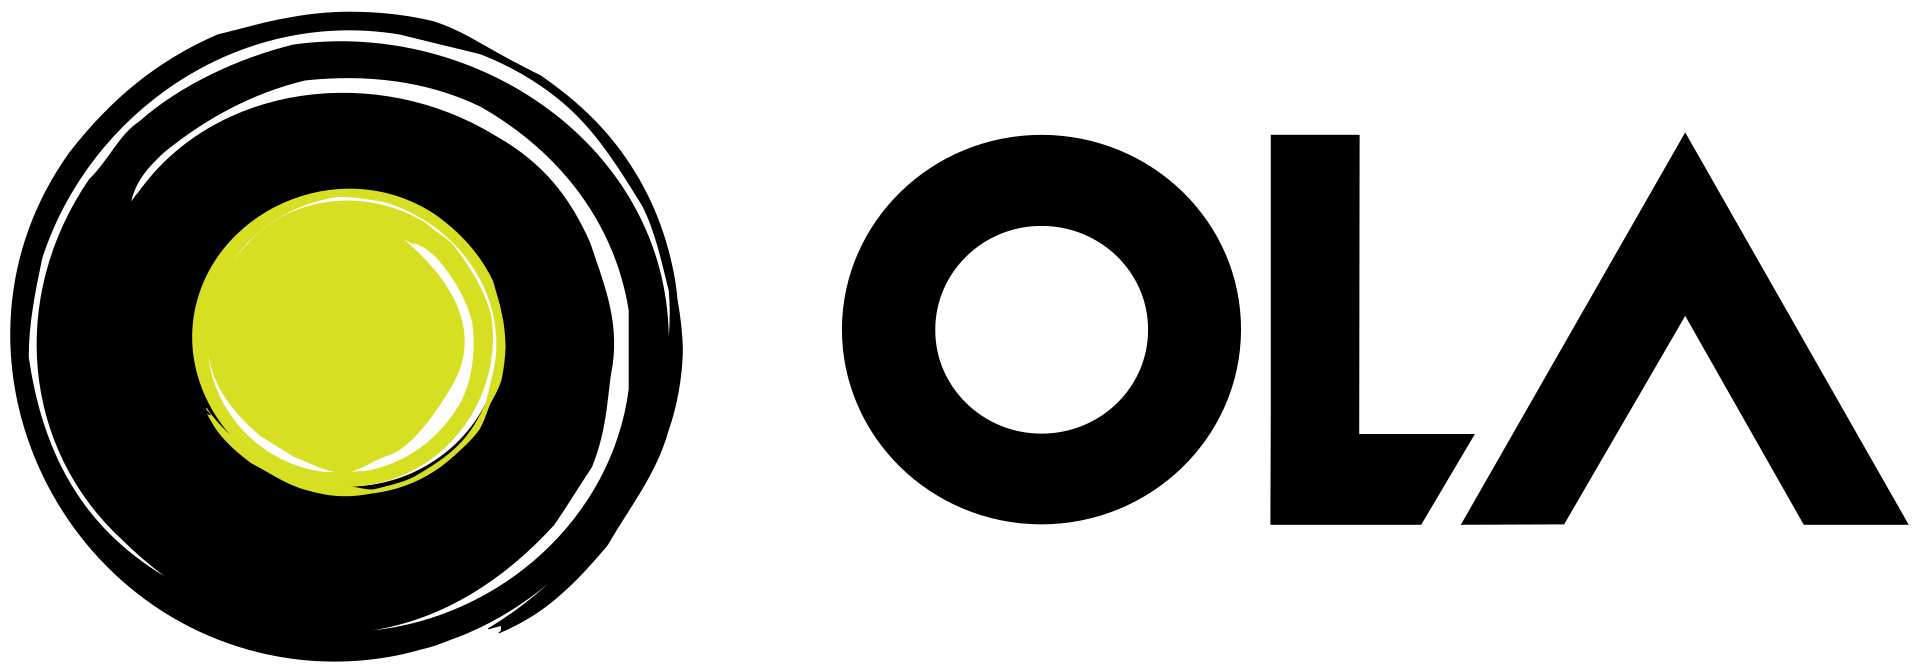

Ola is India’s largest mobility platform and one of the world’s largest ride-hailing companies, serving 250+ cities across India, Australia, New Zealand, and the UK. The Ola app offers mobility solutions by connecting customers to drivers and a wide range of vehicles across bikes, auto-rickshaws, metered taxis, and cabs, enabling convenience and transparency for hundreds of millions of consumers and over 1.5 million driver-partners.

## Problem Statement

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

As a Data Scientist working with he Analytics Department of Ola, focused on driver team attrition, you are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like -

1. Demographics (city, age, gender etc.)
2. Tenure information (joining date, Last Date)
3. Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\bsbha\OneDrive\Desktop\Scaler\Sacler Case Studies\Case Study 9 - Ola\ola_driver.csv")

In [3]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


### Column Profiling:

Unnamed: 0 : index / unique no. for every row

MMMM-YY : Reporting Date (Monthly)

Driver_ID : Unique id for drivers

Age : Age of the driver

Gender : Gender of the driver – Male : 0, Female: 1

City : City Code of the driver

Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate

Income : Monthly average Income of the driver

Date Of Joining : Joining date for the driver

LastWorkingDate : Last date of working for the driver

Joining Designation : Designation of the driver at the time of joining

Grade : Grade of the driver at the time of reporting

Total Business Value : The total business value acquired by the driver in a month (negative business indicates 

cancellation/refund or car EMI adjustments)

Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

Let us do some basic exploratory analysis now..

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


Overall there are 19104 rows and 14 columns.

The column named "Unnamed: 0" serves no specific purpose in our dataset, hence it's better to drop the column

In [5]:
df.drop(columns='Unnamed: 0',axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [7]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [8]:
df.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [9]:
df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

We can see that there are certain columns with null values in our dataset. The most highlighted is LastWorkingDay, which technically shows the last date of working of any driver for ola, which is our target variable. Let us first do further analysis and then see what and how to handle this null specifically.

Let us now try to find out if there are any duplicates in our dataset by checkin for uniquness of the driver_id

In [10]:
df['Driver_ID'].nunique()

2381

This shows that we have multiple records for the same drivers and we need to find a way to handle the duplicates and other necessary information by removing unwanted rows from the dataset.

Let us now try to create some meaning out of the data for our Machine learning model 

In [11]:
df_copy = df.copy(deep=True)

In [12]:
initial =  (df_copy.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna()).reset_index()

In [13]:
initial.head()

,Driver_ID,LastWorkingDate
0,1,False
1,2,True
2,4,False
3,5,False
4,6,True


In [14]:
initial['LastWorkingDate'].replace({True:1,False:0},inplace=True)

In [15]:
initial.head()

,Driver_ID,LastWorkingDate
0,1,0
1,2,1
2,4,0
3,5,0
4,6,1


In [16]:
initial.shape # Just to conform if the number of drivers as derived by the nuique function is still the same after finding out the target variable

(2381, 2)

Let us also try to find out if the driver in our dataset has ever gotten any raise / promotion during his time in ola. For that let us create two separate dataframes and find out the first and last value of column income, this way we would be able to compare the initial salary and the salary drawn in the latest pay.

In [17]:
income_initial = df_copy.groupby('Driver_ID').agg({'Income':'first'})['Income'].reset_index()

In [18]:
income_last = df_copy.groupby('Driver_ID').agg({'Income':'last'})['Income'].reset_index()

In [19]:
income_initial.shape,income_last.shape

((2381, 2), (2381, 2))

Let us merge the newly created columns / dataframes with the target variable dataframe to check if the driver got any raise or not

In [20]:
initial = initial.merge(income_initial,on='Driver_ID')
initial = initial.merge(income_last,on='Driver_ID')

In [21]:
initial.head()

,Driver_ID,LastWorkingDate,Income_x,Income_y
0,1,0,57387,57387
1,2,1,67016,67016
2,4,0,65603,65603
3,5,0,46368,46368
4,6,1,78728,78728


In [22]:
initial['Income_raise'] = np.where(initial['Income_x'] == initial['Income_y'],0,1)

In [23]:
initial.head()

,Driver_ID,LastWorkingDate,Income_x,Income_y,Income_raise
0,1,0,57387,57387,0
1,2,1,67016,67016,0
2,4,0,65603,65603,0
3,5,0,46368,46368,0
4,6,1,78728,78728,0


Let us do the same for quarterly rating column to check if the driver has recieved any prmotion or not

In [24]:
quarterly_r_initial = df_copy.groupby('Driver_ID').agg({'Quarterly Rating':'first'})['Quarterly Rating'].reset_index()
quarterly_r_last = df_copy.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'].reset_index()

In [25]:
quarterly_r_initial.shape,quarterly_r_last.shape # just to verify the number of drivers

((2381, 2), (2381, 2))

In [26]:
initial = initial.merge(quarterly_r_initial,on='Driver_ID')
initial = initial.merge(quarterly_r_last,on='Driver_ID')

In [27]:
initial.head()

,Driver_ID,LastWorkingDate,Income_x,Income_y,Income_raise,Quarterly Rating_x,Quarterly Rating_y
0,1,0,57387,57387,0,2,2
1,2,1,67016,67016,0,1,1
2,4,0,65603,65603,0,1,1
3,5,0,46368,46368,0,1,1
4,6,1,78728,78728,0,1,2


In [28]:
initial['Promotion'] = np.where(initial['Quarterly Rating_x']==initial['Quarterly Rating_y'],0,1)

In [29]:
initial.head()

,Driver_ID,LastWorkingDate,Income_x,Income_y,Income_raise,Quarterly Rating_x,Quarterly Rating_y,Promotion
0,1,0,57387,57387,0,2,2,0
1,2,1,67016,67016,0,1,1,0
2,4,0,65603,65603,0,1,1,0
3,5,0,46368,46368,0,1,1,0
4,6,1,78728,78728,0,1,2,1


Now that we have the status of whether raise and prmotion is given or not we can actually extract the relevant columns from the 'initial' dataframe and merge it back woth the copy of the dataframe we created to gather more insights about the driver churn rate.

In [30]:
initial.drop(columns=['Income_x','Income_y','Quarterly Rating_x','Quarterly Rating_y'],axis=1,inplace=True)

In [31]:
initial.head()

,Driver_ID,LastWorkingDate,Income_raise,Promotion
0,1,0,0,0
1,2,1,0,0
2,4,0,0,0
3,5,0,0,0
4,6,1,0,1


In [32]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


Let us try to first narrow down the df_copy table based on the data of total drivers present to remove the chances of any redundancies and duplication affecting the outcome of data.

In [33]:
f = {
    'MMM-YY':'count',
    'Driver_ID':'first',
    'Age':'max',
    'Gender':'last',
    'City':'last',
    'Education_Level':'last',
    'Dateofjoining':'first',
    'LastWorkingDate':'last',
    'Grade':'last',
    'Total Business Value':'sum',
    'Income':'sum',
    'Dateofjoining':'first',
    'LastWorkingDate':'last',
    'Joining Designation':'last',
    'Grade':'last',
    'Quarterly Rating':'first'
}

In [34]:
df_copy = df_copy.groupby('Driver_ID').aggregate(f)

In [35]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2381 entries, 1 to 2788
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                2381 non-null   int64  
 1   Driver_ID             2381 non-null   int64  
 2   Age                   2381 non-null   float64
 3   Gender                2381 non-null   float64
 4   City                  2381 non-null   object 
 5   Education_Level       2381 non-null   int64  
 6   Dateofjoining         2381 non-null   object 
 7   LastWorkingDate       1616 non-null   object 
 8   Grade                 2381 non-null   int64  
 9   Total Business Value  2381 non-null   int64  
 10  Income                2381 non-null   int64  
 11  Joining Designation   2381 non-null   int64  
 12  Quarterly Rating      2381 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 260.4+ KB


we can now change the datatype of Dateofjoining to date as that will make more sense and at the same time we can extract the value of months and and year from each of the date for building ML model.

In [36]:
df_copy['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'],format='mixed')

In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2381 entries, 1 to 2788
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                2381 non-null   int64         
 1   Driver_ID             2381 non-null   int64         
 2   Age                   2381 non-null   float64       
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   int64         
 6   Dateofjoining         2381 non-null   datetime64[ns]
 7   LastWorkingDate       1616 non-null   object        
 8   Grade                 2381 non-null   int64         
 9   Total Business Value  2381 non-null   int64         
 10  Income                2381 non-null   int64         
 11  Joining Designation   2381 non-null   int64         
 12  Quarterly Rating      2381 non-null   int64         
dtypes: datetime64[ns](1), f

In [38]:
df_copy.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating
Driver_ID,,,,,,,,,,,,,
1,3,1,28.0,0.0,C23,2,2018-12-24,03/11/19,1,1715580,172161,1,2
2,2,2,31.0,0.0,C7,2,2018-12-24,None,2,0,134032,2,1
4,5,4,43.0,0.0,C13,2,2020-11-06,27/04/20,2,350000,328015,2,1
5,3,5,29.0,0.0,C9,0,2019-12-07,03/07/19,1,120360,139104,1,1
6,5,6,31.0,1.0,C11,1,2019-12-07,None,3,1265000,393640,3,1


In [39]:
df_copy['monthofjoining'] = pd.DatetimeIndex(df_copy['Dateofjoining']).month
df_copy['yearofjoining'] = pd.DatetimeIndex(df_copy['Dateofjoining']).year

In [40]:
df_copy.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,monthofjoining,yearofjoining
Driver_ID,,,,,,,,,,,,,,,
1,3,1,28.0,0.0,C23,2,2018-12-24,03/11/19,1,1715580,172161,1,2,12,2018
2,2,2,31.0,0.0,C7,2,2018-12-24,None,2,0,134032,2,1,12,2018
4,5,4,43.0,0.0,C13,2,2020-11-06,27/04/20,2,350000,328015,2,1,11,2020
5,3,5,29.0,0.0,C9,0,2019-12-07,03/07/19,1,120360,139104,1,1,12,2019
6,5,6,31.0,1.0,C11,1,2019-12-07,None,3,1265000,393640,3,1,12,2019


In [41]:
import regex
df_copy['Age'] = df_copy['Age'].astype('int64')
df_copy['Cities'] = df_copy['City'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [42]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2381 entries, 1 to 2788
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                2381 non-null   int64         
 1   Driver_ID             2381 non-null   int64         
 2   Age                   2381 non-null   int64         
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   int64         
 6   Dateofjoining         2381 non-null   datetime64[ns]
 7   LastWorkingDate       1616 non-null   object        
 8   Grade                 2381 non-null   int64         
 9   Total Business Value  2381 non-null   int64         
 10  Income                2381 non-null   int64         
 11  Joining Designation   2381 non-null   int64         
 12  Quarterly Rating      2381 non-null   int64         
 13  monthofjoining        2

In [43]:
df_copy.reset_index(drop=True, inplace=True)
df_copy = df_copy.merge(initial,on='Driver_ID')


In [44]:
df_copy.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate_x,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,monthofjoining,yearofjoining,Cities,LastWorkingDate_y,Income_raise,Promotion
0,3,1,28,0.0,C23,2,2018-12-24,03/11/19,1,1715580,172161,1,2,12,2018,23,0,0,0
1,2,2,31,0.0,C7,2,2018-12-24,None,2,0,134032,2,1,12,2018,7,1,0,0
2,5,4,43,0.0,C13,2,2020-11-06,27/04/20,2,350000,328015,2,1,11,2020,13,0,0,0
3,3,5,29,0.0,C9,0,2019-12-07,03/07/19,1,120360,139104,1,1,12,2019,9,0,0,0
4,5,6,31,1.0,C11,1,2019-12-07,None,3,1265000,393640,3,1,12,2019,11,1,0,1


In [45]:
df_copy.drop(columns=['Dateofjoining','LastWorkingDate_x','City'],axis=1,inplace=True)
df_copy['Gender'] = df_copy['Gender'].astype('int64')

In [46]:
df_copy.rename(columns={'MMM-YY':'Number of Reporting','LastWorkingDate_y':'Target'},inplace=True)

In [47]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Number of Reporting   2381 non-null   int64
 1   Driver_ID             2381 non-null   int64
 2   Age                   2381 non-null   int64
 3   Gender                2381 non-null   int64
 4   Education_Level       2381 non-null   int64
 5   Grade                 2381 non-null   int64
 6   Total Business Value  2381 non-null   int64
 7   Income                2381 non-null   int64
 8   Joining Designation   2381 non-null   int64
 9   Quarterly Rating      2381 non-null   int64
 10  monthofjoining        2381 non-null   int32
 11  yearofjoining         2381 non-null   int32
 12  Cities                2381 non-null   int32
 13  Target                2381 non-null   int64
 14  Income_raise          2381 non-null   int32
 15  Promotion             2381 non-null   int32
dtypes: int

## Univariate Analysis

<Axes: xlabel='Gender', ylabel='count'>

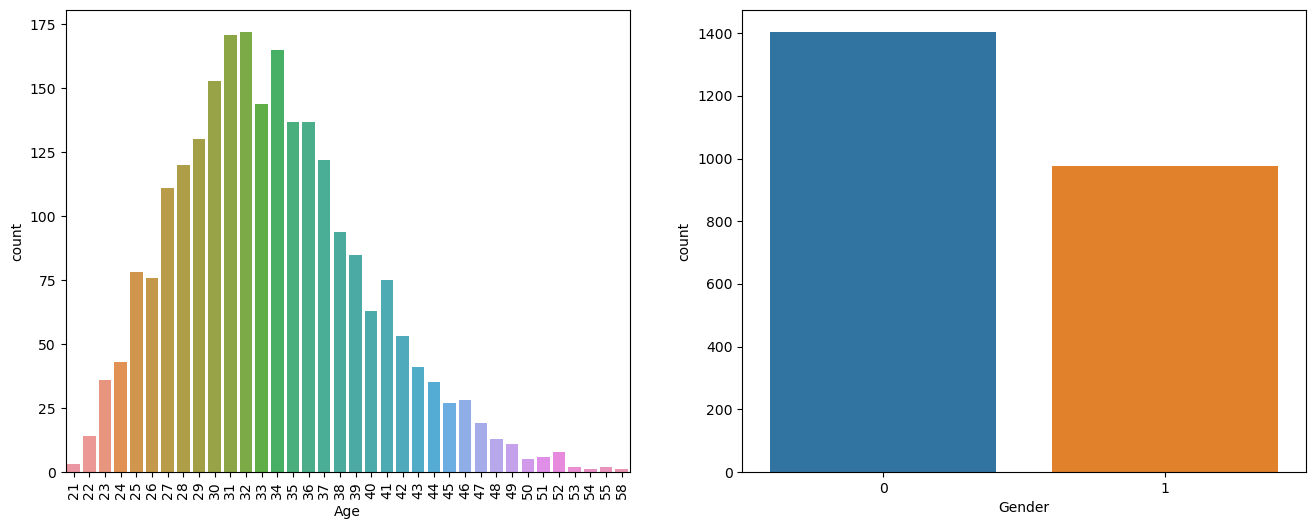

In [48]:
fig = plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x='Age',data=df_copy)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot(x='Gender',data=df_copy)


In [49]:
df_copy['Gender'].value_counts(normalize=True)*100

Gender
0    58.966821
1    41.033179
Name: proportion, dtype: float64

<Axes: xlabel='Grade', ylabel='count'>

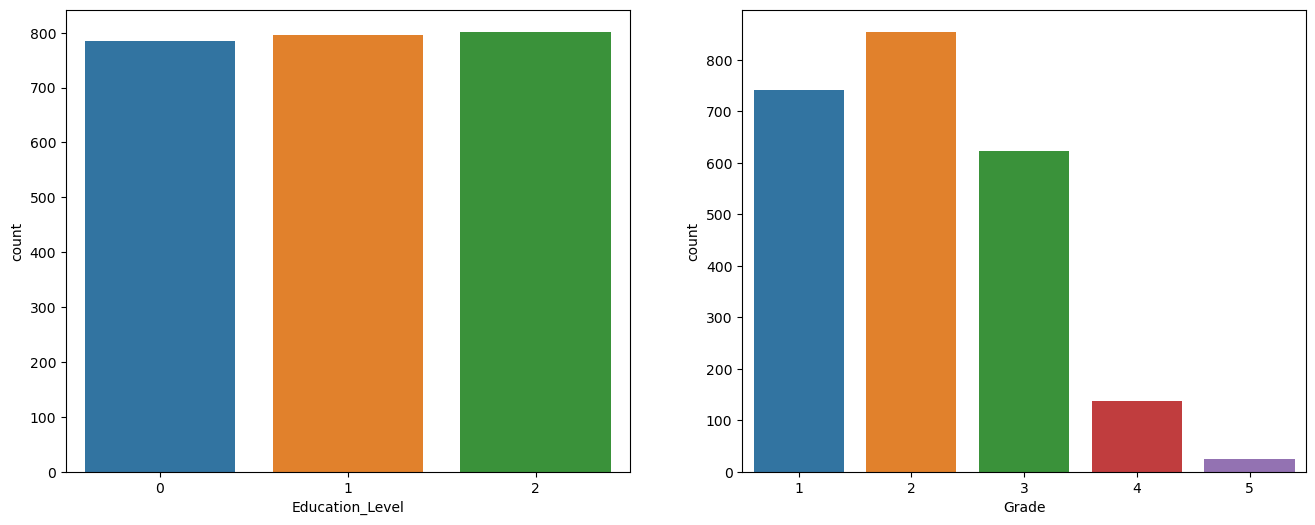

In [50]:
fig = plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x='Education_Level',data=df_copy)
plt.subplot(1,2,2)
sns.countplot(x='Grade',data=df_copy)

From the above four graphs we can see that -
1. Most of the drivers are in the range of 25-42 and mojority are 30-34
2. There are more male drivers than female drivers
3. Education level has no significant role here, each education level has more or ledd same number of drivers.
4. Drivers with grade 2 are the highest while with the grades 4-5 are lowest at the time of joining.

<Axes: xlabel='monthofjoining', ylabel='count'>

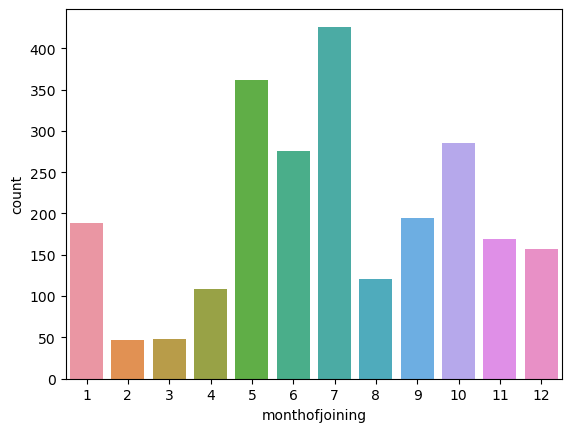

In [51]:
sns.countplot(x='monthofjoining',data=df_copy)

Most of the drivers have joined in the month of July, rest the number does not vary much except for the months of February and March.

<Axes: xlabel='yearofjoining', ylabel='count'>

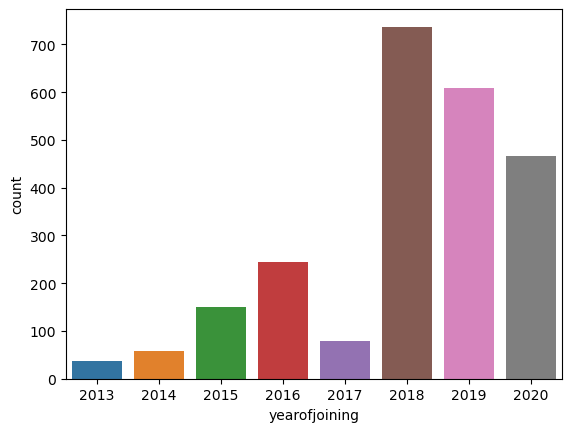

In [52]:
sns.countplot(x='yearofjoining',data=df_copy)

Here we can see the data is spread across 8 years (2013 - 2020). A significant amount of jump in the joining / no. of drivers is observed after the year 2017, most of it in the year 2018.

In [53]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Number of Reporting   2381 non-null   int64
 1   Driver_ID             2381 non-null   int64
 2   Age                   2381 non-null   int64
 3   Gender                2381 non-null   int64
 4   Education_Level       2381 non-null   int64
 5   Grade                 2381 non-null   int64
 6   Total Business Value  2381 non-null   int64
 7   Income                2381 non-null   int64
 8   Joining Designation   2381 non-null   int64
 9   Quarterly Rating      2381 non-null   int64
 10  monthofjoining        2381 non-null   int32
 11  yearofjoining         2381 non-null   int32
 12  Cities                2381 non-null   int32
 13  Target                2381 non-null   int64
 14  Income_raise          2381 non-null   int32
 15  Promotion             2381 non-null   int32
dtypes: int

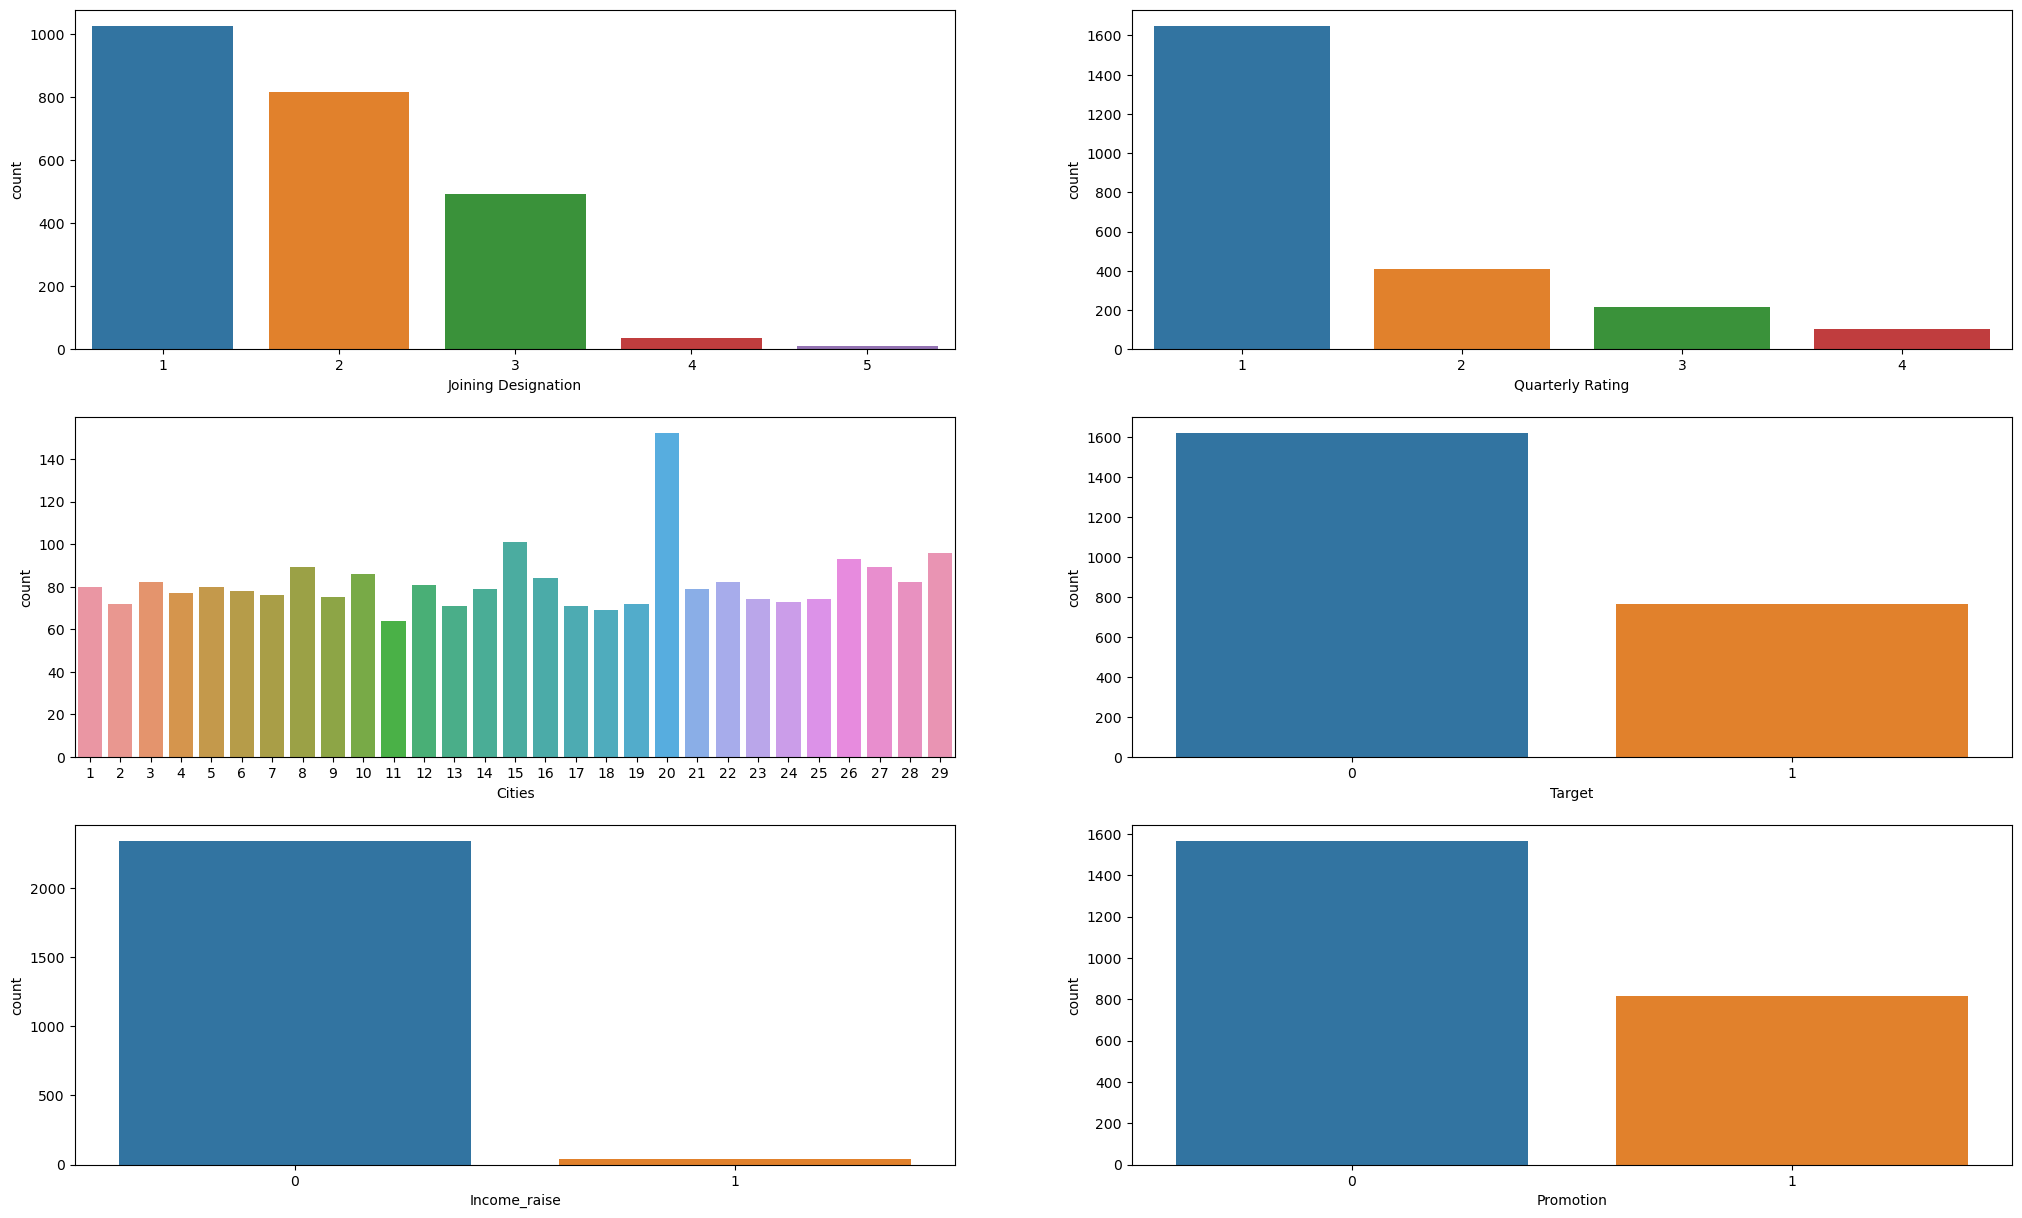

In [54]:
plt.figure(figsize=(25,15))
plt.subplot(3,2,1)
sns.countplot(x='Joining Designation',data=df_copy)

plt.subplot(3,2,2)
sns.countplot(x='Quarterly Rating', data=df_copy)

plt.subplot(3,2,3)
sns.countplot(x='Cities',data=df_copy)

plt.subplot(3,2,4)
sns.countplot(x='Target',data=df_copy)

plt.subplot(3,2,5)
sns.countplot(x='Income_raise',data=df_copy)

plt.subplot(3,2,6)
sns.countplot(x='Promotion',data=df_copy)

plt.show()

In [55]:
df_copy['Income_raise'].value_counts(normalize=True)*100

Income_raise
0    98.194036
1     1.805964
Name: proportion, dtype: float64

In [56]:
df_copy['Promotion'].value_counts(normalize=True)*100

Promotion
0    65.728685
1    34.271315
Name: proportion, dtype: float64

We can observe that - 
1. Most drivers have '1' joining designation.
2. Most drivers have recievd 1 as quarterly raiting.
3. A lot of drivers prefer city C20.
4. The target variable seems to be imbalanced.
5. Not a lot of drivers were given raises - there is a huge gap.
6. Almost 50% more drivers have not received promotion. 

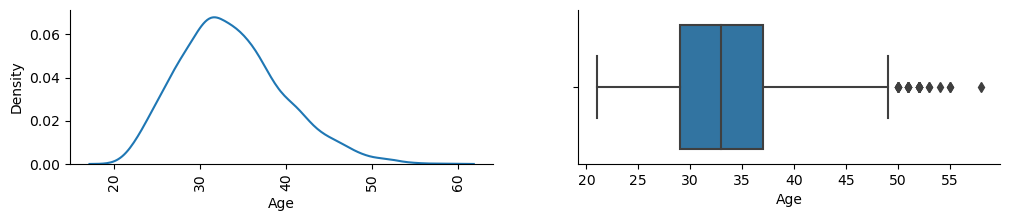

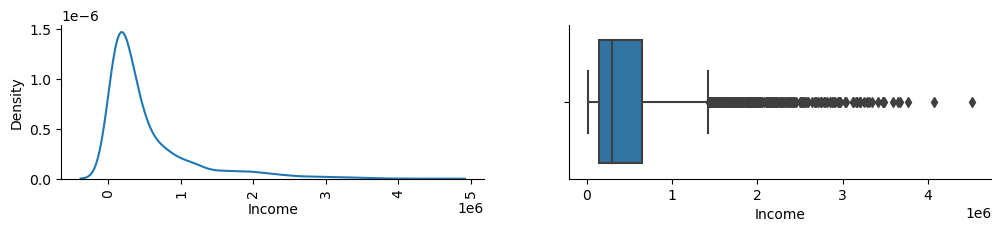

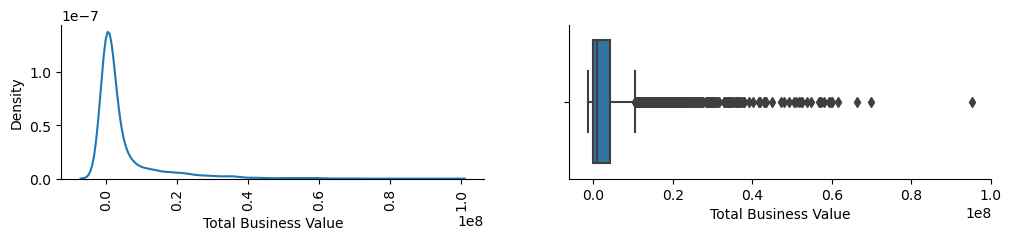

In [57]:
a = df_copy[['Age','Income','Total Business Value']]
for i in a:
    plt.figure(figsize=(12,2))
    plt.subplot(1,2,1)
    sns.kdeplot(x=df_copy[i])
    plt.title('')
    plt.xticks(rotation=90)

    plt.subplot(1,2,2)
    sns.boxplot(x=df_copy[i])
    plt.title('')
    sns.despine()
    plt.show()

In [58]:
sorted(df_copy['Total Business Value'])

[-1385530,
 -645150,
 -500000,
 -439300,
 -411250,
 -134880,
 -101180,
 -96960,
 -70000,
 -14310,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0

In [59]:
len(df_copy[df_copy['Total Business Value']<1])

729

As we can see that there are 729 values for 'Total Business Value' that are either 0 or less than 1 that may affect our model in a negative way and is also behaving like an outlier. Thus, we may want to remove them and see what it does after building model with and without these values.

## Bivariate Analysis

<Axes: >

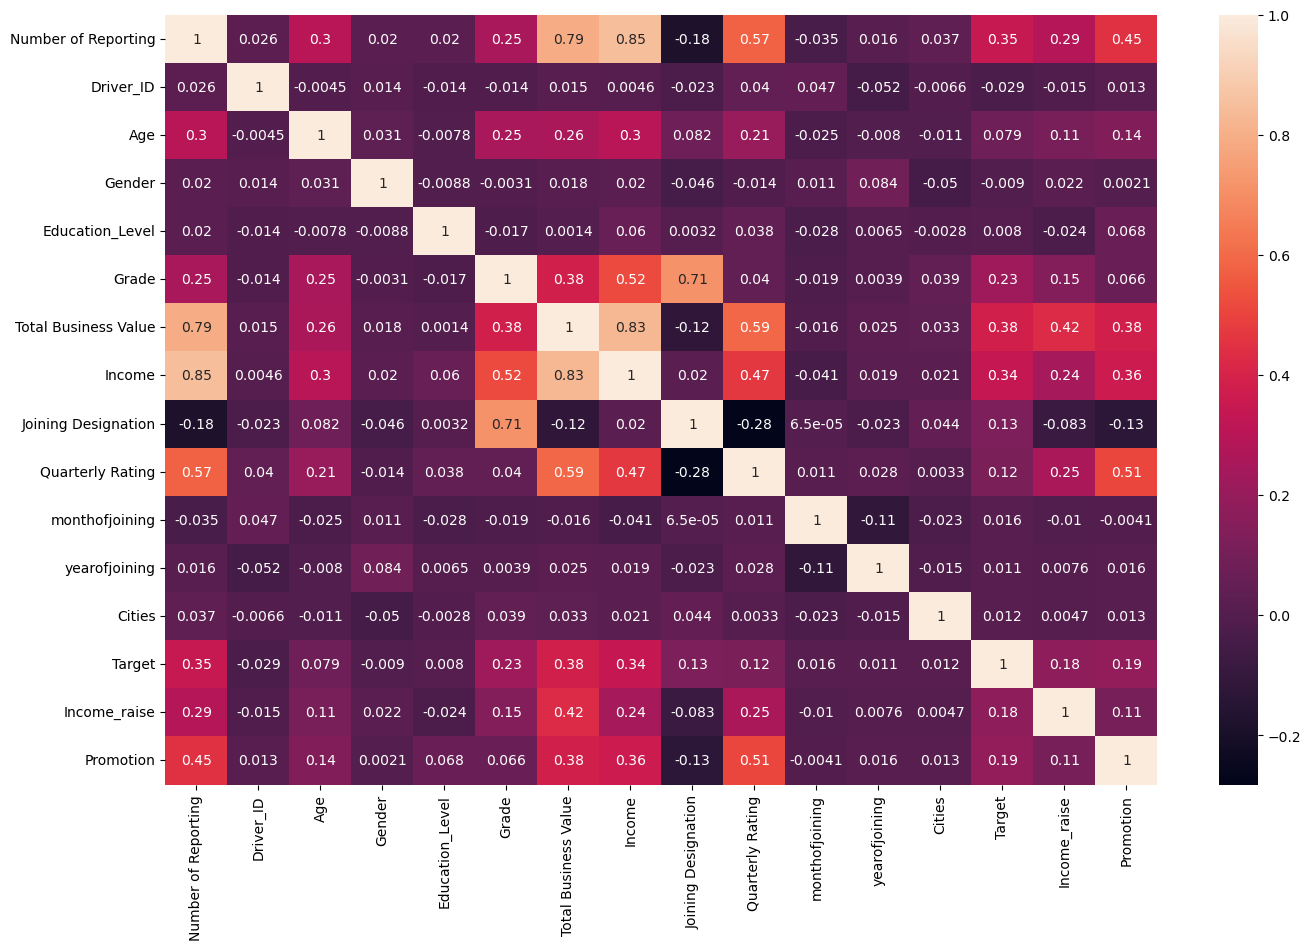

In [60]:
fig = plt.figure(figsize=(16,10))
sns.heatmap(df_copy.corr(),annot=True)

C:\Users\bsbha\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


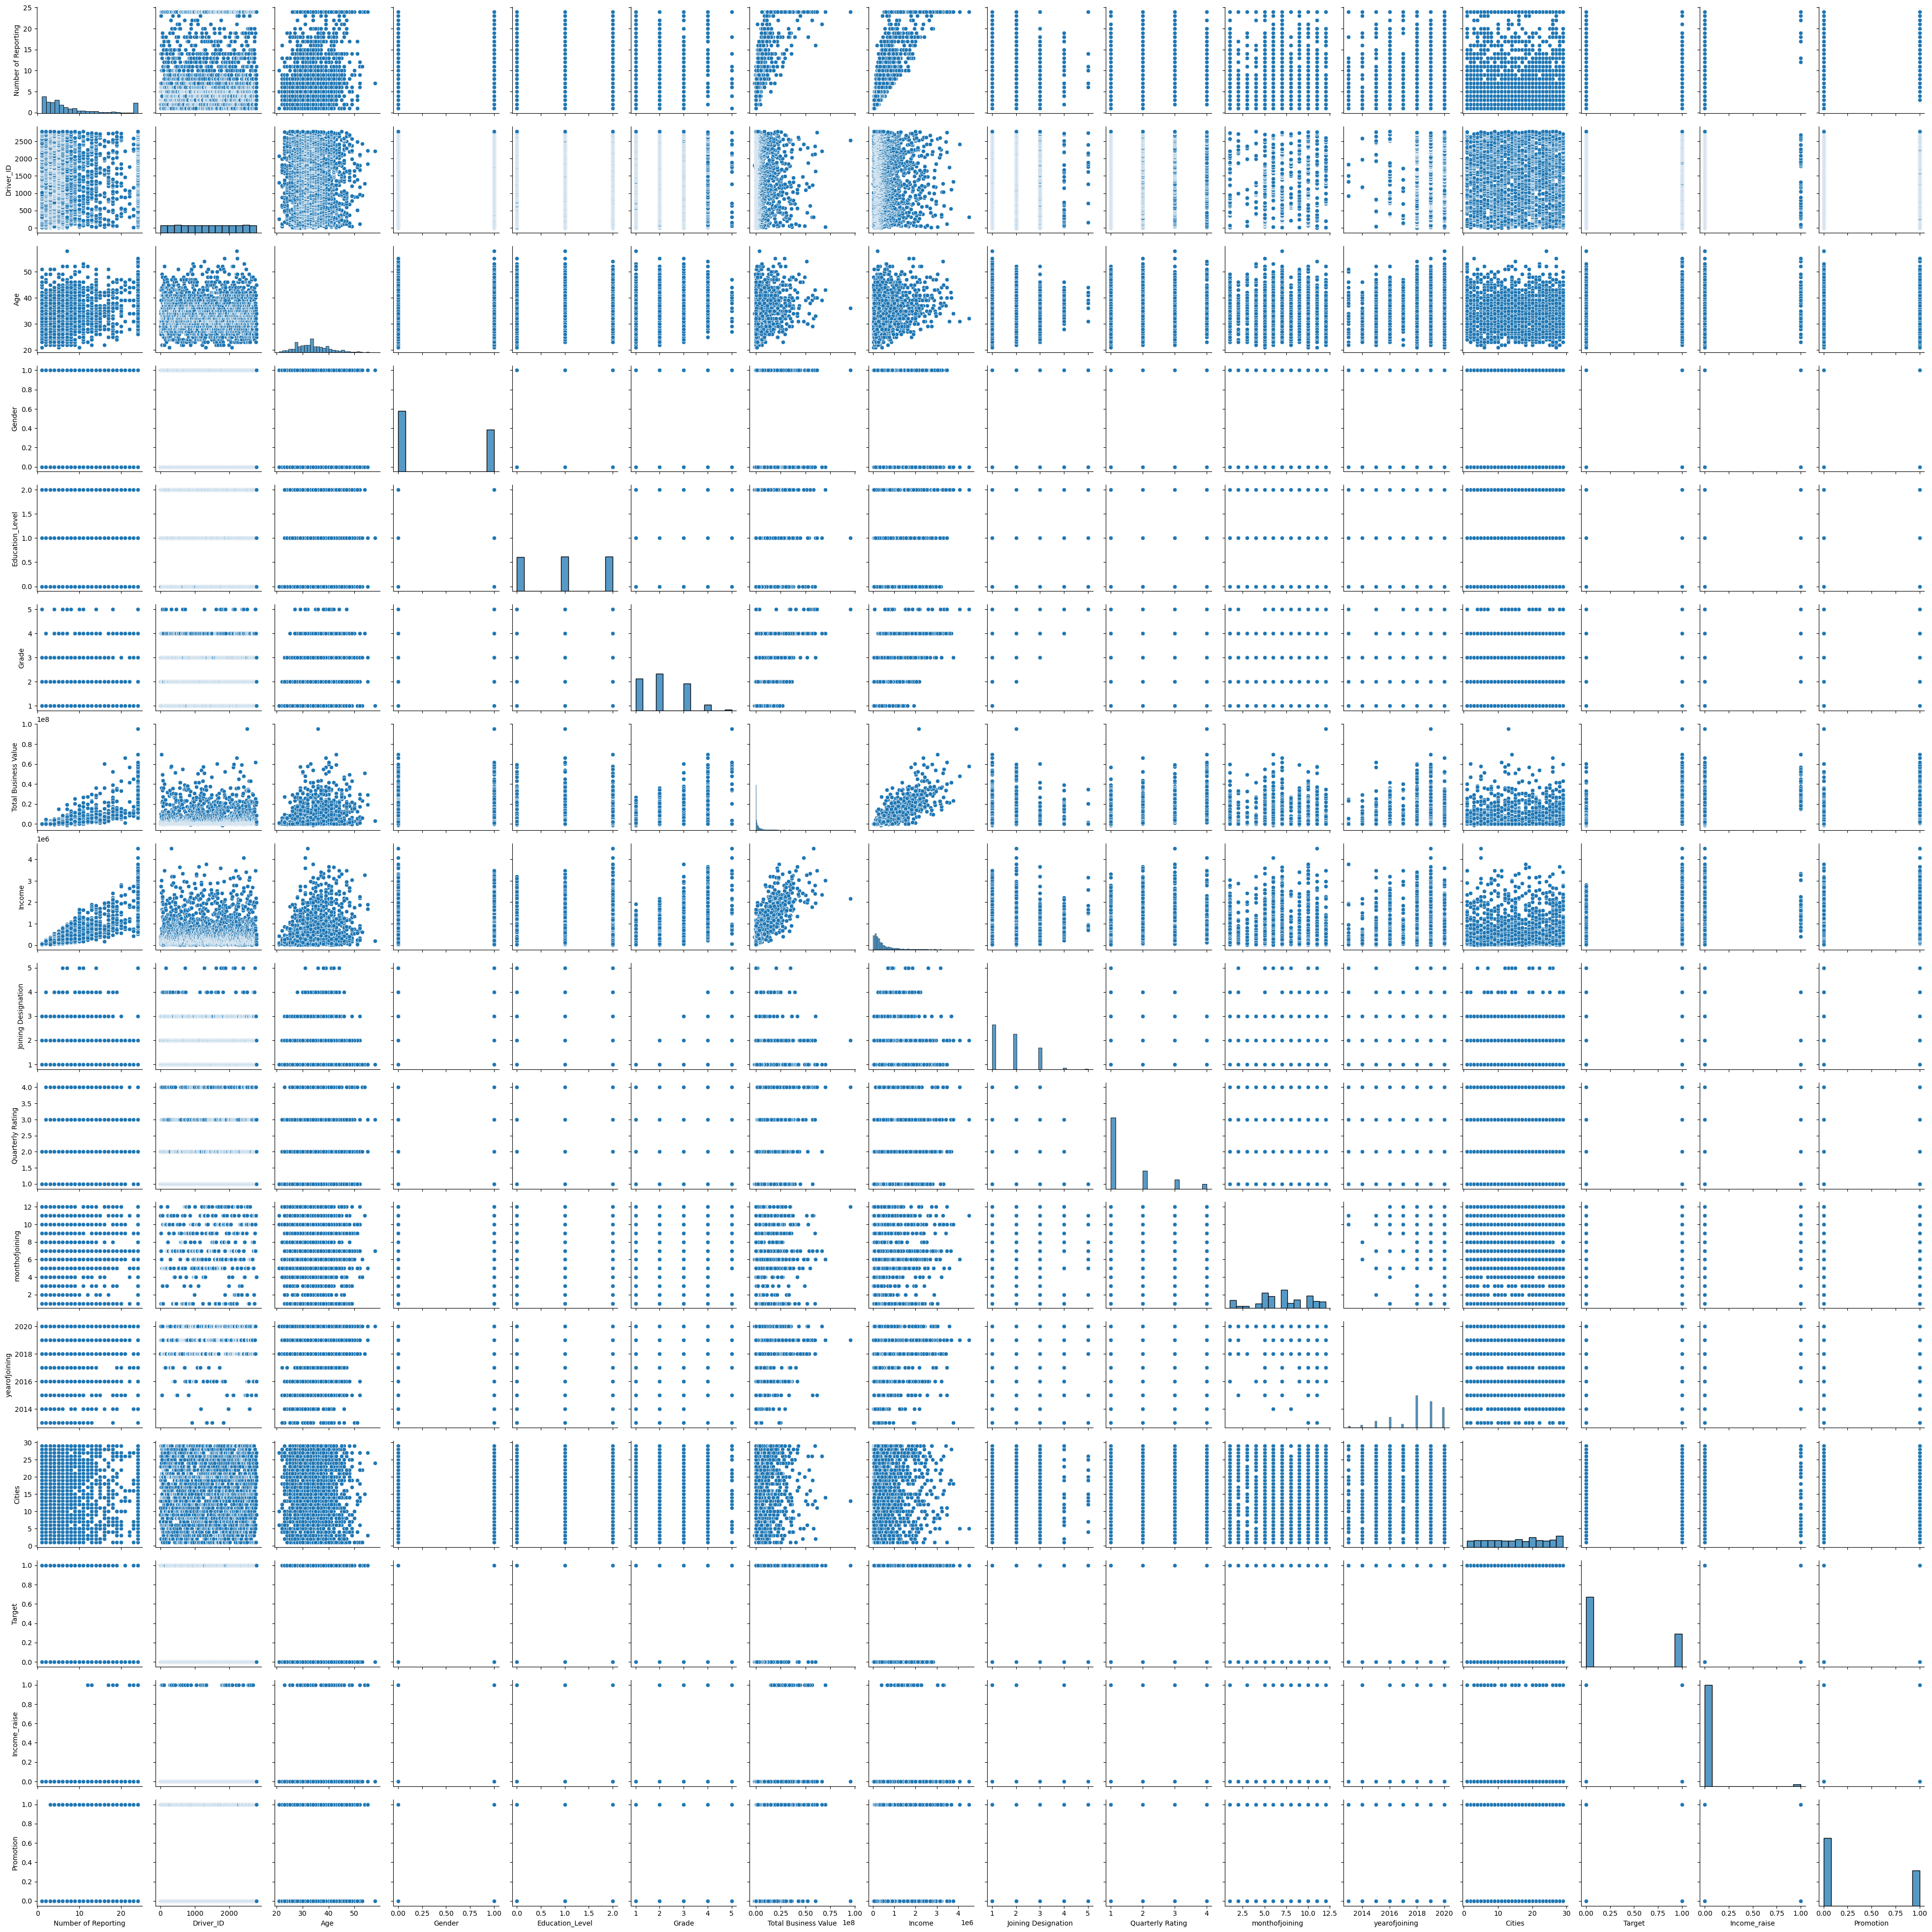

In [61]:
sns.pairplot(df_copy)

From above, we can see that -
1. Number of reportigs is directly proportional to the income and total business value.
2. Age can also be seen to be impacting income and total business value directly.
3. Sunsequently we can also see that income and total business value are correlated to some extent.

Now that we have done all the feature engineering and basic EDA, let us now work with building model without first treating the data imbalance.

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [63]:
X = df_copy.drop('Target',axis=1)
y = df_copy['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [64]:
X.head()

,Number of Reporting,Driver_ID,Age,Gender,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,monthofjoining,yearofjoining,Cities,Income_raise,Promotion
0,3,1,28,0,2,1,1715580,172161,1,2,12,2018,23,0,0
1,2,2,31,0,2,2,0,134032,2,1,12,2018,7,0,0
2,5,4,43,0,2,2,350000,328015,2,1,11,2020,13,0,0
3,3,5,29,0,0,1,120360,139104,1,1,12,2019,9,0,0
4,5,6,31,1,1,3,1265000,393640,3,1,12,2019,11,0,1


In [65]:
X.shape, y.shape

((2381, 15), (2381,))

In [66]:
X_train.shape,y_train.shape

((1904, 15), (1904,))

In [67]:
X_test.shape, y_test.shape

((477, 15), (477,))

In [68]:
ss = StandardScaler()
ss.fit_transform(X_train)

array([[-0.89285812, -1.0816992 , -0.96409437, ..., -0.64358249,
        -0.13684514, -0.72501105],
       [-0.45183377,  0.78873533,  0.03470985, ...,  0.54714831,
        -0.13684514, -0.72501105],
       [-0.89285812,  0.94728872, -1.13056174, ..., -0.76265557,
        -0.13684514, -0.72501105],
       ...,
       [-0.30482565, -0.09445661,  0.86704669, ..., -1.00080173,
        -0.13684514, -0.72501105],
       [-1.03986624,  0.14089608, -0.46469226, ...,  0.54714831,
        -0.13684514, -0.72501105],
       [-0.59884189, -0.49084008, -0.46469226, ..., -0.40543633,
        -0.13684514, -0.72501105]])

## Random Forest Classifier

In [69]:
rf_clf1 = RandomForestClassifier(criterion='gini',max_depth=7,max_features='sqrt',n_estimators=10)
rf_clf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=10)

In [70]:
y_pred = rf_clf1.predict(X_test)
proba = rf_clf1.predict_proba(X_test)[:,1]
print("Train data accuracy:",rf_clf1.score(X_train, y_train))
print("Test data accuracy:",rf_clf1.score(X_test,y_test))
print('Accuracy of the model:', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*50)
print(classification_report(y_test, y_pred))
print('-'*50)
cm1 = (confusion_matrix(y_test, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Train data accuracy: 0.8539915966386554
Test data accuracy: 0.7966457023060797
Accuracy of the model: 0.7966457023060797
ROC-AUC score test dataset:  0.8288990825688074
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       327
           1       0.85      0.43      0.57       150

    accuracy                           0.80       477
   macro avg       0.82      0.70      0.72       477
weighted avg       0.81      0.80      0.77       477

--------------------------------------------------
Confusion Matrix
[[316  11]
 [ 86  64]]


In [71]:
rf_clf_imp1 = rf_clf1.feature_importances_
rf_clf_imp1

array([0.33233179, 0.0347996 , 0.03848066, 0.00566688, 0.00876309,
       0.04158204, 0.13711553, 0.1229929 , 0.05695222, 0.09868131,
       0.02037794, 0.01860417, 0.02880746, 0.00669023, 0.04815417])

## Gradient Boosting Classifier

In [72]:
gbc1 = GradientBoostingClassifier()
gbc1.fit(X_train, y_train)

GradientBoostingClassifier()

In [73]:
y_pred = gbc1.predict(X_test)
proba =gbc1.predict_proba(X_test)[:, 1]

In [74]:
print('Train Score : ', gbc1.score(X_train, y_train))
print('Test Score : ', gbc1.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*60)
print(classification_report(y_test, y_pred))
print('-'*60)
print('Confusion Matrix')
cm2 = (confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('-'*60)

Train Score :  0.8723739495798319
Test Score :  0.8176100628930818
Accuracy Score :  0.8176100628930818
ROC-AUC score test dataset:  0.8419979612640163
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       327
           1       0.84      0.52      0.64       150

    accuracy                           0.82       477
   macro avg       0.83      0.74      0.76       477
weighted avg       0.82      0.82      0.80       477

------------------------------------------------------------
Confusion Matrix
[[312  15]
 [ 72  78]]
------------------------------------------------------------


Without any data imbalance treatment we can see that our XGBoost algorithm is actually better in terms of performance, accuracy.

Let us now work through by treating Class imbalance by using SMOTE

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
smot = SMOTE(random_state=42)
X_train_smot,y_train_smot = smot.fit_resample(X_train,y_train)

In [77]:
X_train_smot.shape,y_train_smot.shape

((2578, 15), (2578,))

In [78]:
X_test.shape,y_test.shape

((477, 15), (477,))

In [79]:
from collections import Counter
c = Counter(y_train_smot)
print(c)

Counter({1: 1289, 0: 1289})


## Random Classifier After the SMOTE

In [80]:
rf_clf2 = RandomForestClassifier(criterion='gini',max_depth=7,max_features='sqrt',n_estimators=10)
rf_clf2.fit(X_train_smot,y_train_smot)

RandomForestClassifier(max_depth=7, n_estimators=10)

In [81]:
y_pred = rf_clf2.predict(X_test)
proba = rf_clf2.predict_proba(X_test)[:,1]
print("Train data accuracy:",rf_clf2.score(X_train_smot, y_train_smot))
print("Test data accuracy:",rf_clf2.score(X_test,y_test))
print('Accuracy of the model:', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*50)
print(classification_report(y_test, y_pred))
print('-'*50)
cm1 = (confusion_matrix(y_test, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Train data accuracy: 0.835143522110163
Test data accuracy: 0.7714884696016772
Accuracy of the model: 0.7714884696016772
ROC-AUC score test dataset:  0.7906727828746177
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       327
           1       0.65      0.60      0.62       150

    accuracy                           0.77       477
   macro avg       0.73      0.73      0.73       477
weighted avg       0.77      0.77      0.77       477

--------------------------------------------------
Confusion Matrix
[[278  49]
 [ 60  90]]


## Gradient Boosting after the SMOTE

In [82]:
gbc2 = GradientBoostingClassifier()
gbc2.fit(X_train_smot, y_train_smot)

GradientBoostingClassifier()

In [83]:
y_pred = gbc2.predict(X_test)
proba =gbc2.predict_proba(X_test)[:, 1]

In [84]:
print('Train Score : ', gbc2.score(X_train_smot, y_train_smot))
print('Test Score : ', gbc2.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*60)
print(classification_report(y_test, y_pred))
print('-'*60)
print('Confusion Matrix')
cm2 = (confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('-'*60)

Train Score :  0.8665632273079907
Test Score :  0.8301886792452831
Accuracy Score :  0.8301886792452831
ROC-AUC score test dataset:  0.8429765545361876
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       327
           1       0.76      0.68      0.72       150

    accuracy                           0.83       477
   macro avg       0.81      0.79      0.80       477
weighted avg       0.83      0.83      0.83       477

------------------------------------------------------------
Confusion Matrix
[[294  33]
 [ 48 102]]
------------------------------------------------------------


After treating the class imbalance we can see that the XGBoost is performing well showing more accuracy than the Bagging algorithm.

Experimenting with the data after removing the values that have Total Business Value less than 1.

## Bagging

In [85]:
df_copy = df_copy[df_copy['Total Business Value'] > 1]

In [86]:
df_copy.shape

(1652, 16)

In [87]:
X = df_copy.drop('Target',axis=1)
y = df_copy['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [88]:
ss = StandardScaler()
ss.fit_transform(X_train)

array([[-0.61446611, -1.09640018,  1.70794584, ..., -0.04979913,
        -0.16737851,  1.023749  ],
       [ 1.93718866, -1.32951199,  1.54780698, ..., -0.5247786 ,
        -0.16737851, -0.97680193],
       [-0.18919032, -1.0914666 ,  0.26669606, ...,  1.25639439,
        -0.16737851,  1.023749  ],
       ...,
       [-0.75622471,  0.03585718, -1.49483144, ..., -0.88101319,
        -0.16737851, -0.97680193],
       [ 0.51960268,  1.32105562, -1.33469258, ..., -1.59348238,
        -0.16737851,  1.023749  ],
       [-0.33094892,  0.60815284, -0.69413712, ..., -0.28728886,
        -0.16737851, -0.97680193]])

In [89]:
rf_clf3 = RandomForestClassifier(criterion='gini',max_depth=7,max_features='sqrt',n_estimators=10)
rf_clf3.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=10)

In [90]:
y_pred = rf_clf3.predict(X_test)
proba = rf_clf3.predict_proba(X_test)[:,1]
print("Train data accuracy:",rf_clf3.score(X_train, y_train))
print("Test data accuracy:",rf_clf3.score(X_test,y_test))
print('Accuracy of the model:', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*50)
print(classification_report(y_test, y_pred))
print('-'*50)
cm1 = (confusion_matrix(y_test, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Train data accuracy: 0.8629825889477668
Test data accuracy: 0.7945619335347432
Accuracy of the model: 0.7945619335347432
ROC-AUC score test dataset:  0.8397810503350476
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       207
           1       0.88      0.52      0.66       124

    accuracy                           0.79       331
   macro avg       0.82      0.74      0.76       331
weighted avg       0.81      0.79      0.78       331

--------------------------------------------------
Confusion Matrix
[[198   9]
 [ 59  65]]


## Boosting

In [91]:
gbc3 = GradientBoostingClassifier()
gbc3.fit(X_train, y_train)

GradientBoostingClassifier()

In [92]:
y_pred = gbc3.predict(X_test)
proba =gbc3.predict_proba(X_test)[:, 1]

In [93]:
print('Train Score : ', gbc3.score(X_train_smot, y_train_smot))
print('Test Score : ', gbc3.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*60)
print(classification_report(y_test, y_pred))
print('-'*60)
print('Confusion Matrix')
cm2 = (confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('-'*60)

Train Score :  0.7424359968968193
Test Score :  0.824773413897281
Accuracy Score :  0.824773413897281
ROC-AUC score test dataset:  0.8874474053295933
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       207
           1       0.85      0.65      0.73       124

    accuracy                           0.82       331
   macro avg       0.83      0.79      0.80       331
weighted avg       0.83      0.82      0.82       331

------------------------------------------------------------
Confusion Matrix
[[193  14]
 [ 44  80]]
------------------------------------------------------------


## Recommendation and Insights

1. There are roughly 60% Male Drivers and 40% Female Drivers.
2. The Education level of the drivers do not vary much.
3. One alarming thing that is noticed is, out of all the drivers roughly 98% did not recieve any raise - which is something that OLA should look into - a raise can mean the driver might not leave. Thus, a raise based on number of trips, or performance, or raiting from the passengers, could be given to the drivers.
4. If not a raise, then may be, OLA can start an insentive program for the drivers who are performing well and can add that to the dataset as well for better understanding and model building.
5. Rating given by user could be added to the dataset for a better model building.
6. The performance of Boosting algorithm enhanced after SMOTE treatment.